# Count bacteria

bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Number of components (excluding background):  26


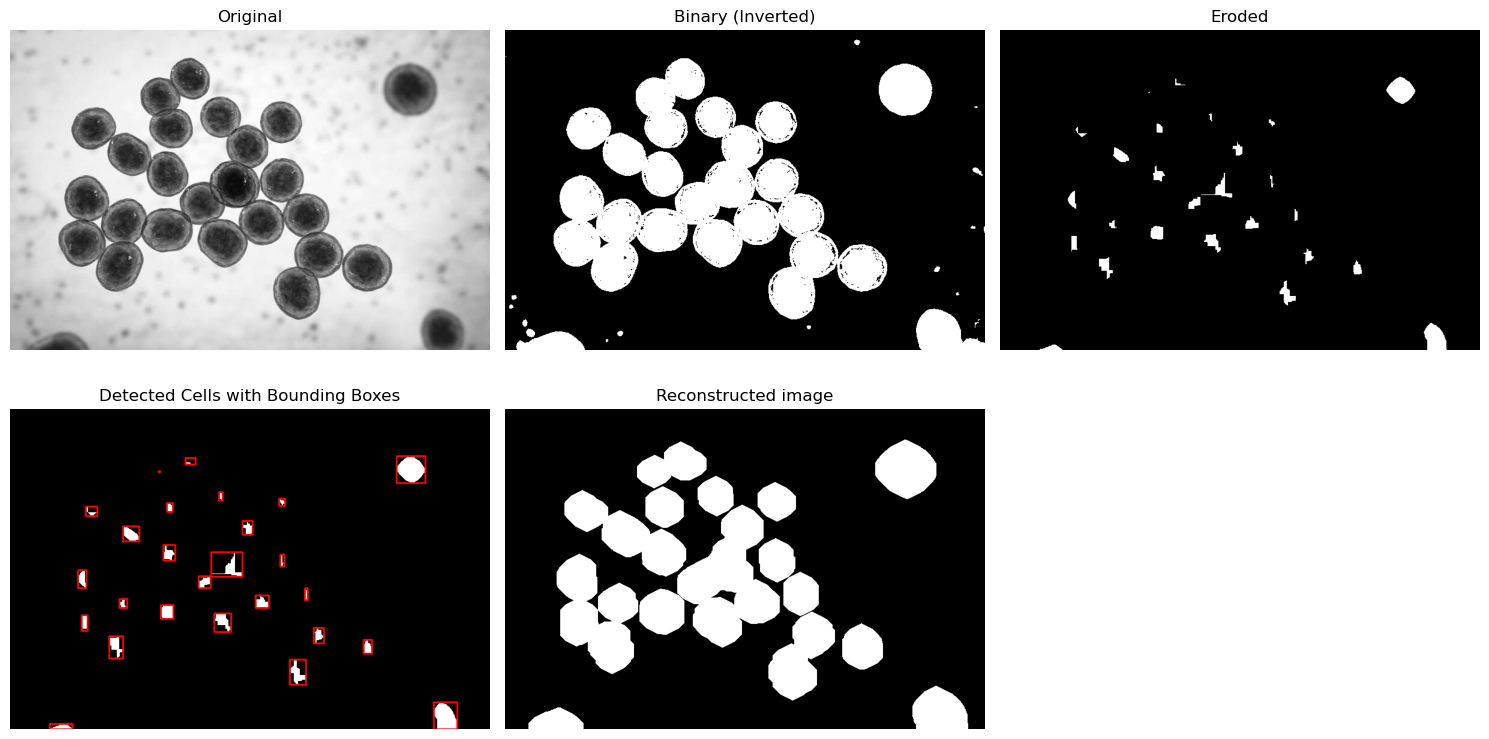

In [6]:
# Load image (grayscale)
img = cv2.imread(r'C:\Users\Nafis Rayaneh\OneDrive\Desktop\TeckStack\techstack2025-ai\week2\assets\bacteria.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

# Otsu thresholding
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Flip the colors (for morphology)
binary = cv2.bitwise_not(binary)

# TODO: Erosion to remove small noise
kernel_size=(18, 18)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
eroded = cv2.erode(binary, kernel, iterations=2)

# TODO: Connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(eroded, connectivity=8)

# TODO: print the number of components (excluding background)
print("Number of components (excluding background): ", num_labels-1)

# TODO: Draw results (Boxes)

# Convert the eroded binary image to BGR so we can draw colored rectangles on it
output = cv2.cvtColor(eroded, cv2.COLOR_GRAY2BGR)
# Loop over each connected component (skip 0 because it's the background)
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    # Draw a red rectangle around the component
    cv2.rectangle(output, (x, y), (x+w, y+h), (255, 0, 0), 2)

# BONUS PART
# Estimate kernel size from median cell area

# Extract the areas of all detected connected components (cells)
cell_areas = stats[1:, cv2.CC_STAT_AREA]
median_area = np.median(cell_areas)
# Approximate a representative cell size by taking the square root of the median area
approx_size = int(np.sqrt(median_area))

kernel_size = (max(3, approx_size//2), max(3, approx_size//2))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

# Reconstruct cells by dilation
dilated = cv2.dilate(eroded, kernel, iterations=9)

# TODO: Display

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title('Binary (Inverted)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(output, cmap='gray')
plt.title('Detected Cells with Bounding Boxes')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(dilated, cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')

plt.tight_layout()
plt.show()